---
<h1><center>IDS 435 - Assignment 1</center></h1>

    
- First Name: Yelizaveta 
- Last Name: Semikina
- UIN: 670246811

**Question 1.**<br></br>

Consider the following functions:

$$f_1(x) := x^{4}-x^{3}-x^{2}, \ \text{ for } x \text{ in the interval of } [-3,3]$$
$$f_2(x) := \left( 1.5 - x_1 + x_1x_2 \right)^{2} + \left( 2.25 - x_1 + x_1x_2^{2}\right)^{2}+ \left( 2.625 - x_1 + x_1x_2^{3}\right)^{2}, \ \text{ for } x_1 \text{ and } x_2 \text{ in the interval of } [-4,4]. $$

1. 
    Plot the 1D function $f_1$ using the [```matplotlib```](https://matplotlib.org/stable/plot_types/index.html) library in Python. Next, construct [contour](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#contour-demo) plot of the 2D function $f_2$. A sample code is provided below.<br></br>
    
2. 
    Use your plots in Part (1) to visually identify any local minima, global minima, or inflection points of $f_1$ and $f_2$. <br></br>

3. 
    Verify whether the first-order necessary condition (FONC) and the second-order necessary condition (SONC) hold for $f_1$ and $f_2$ at the local minima, global minima, and the inflection points you found in Part (2).

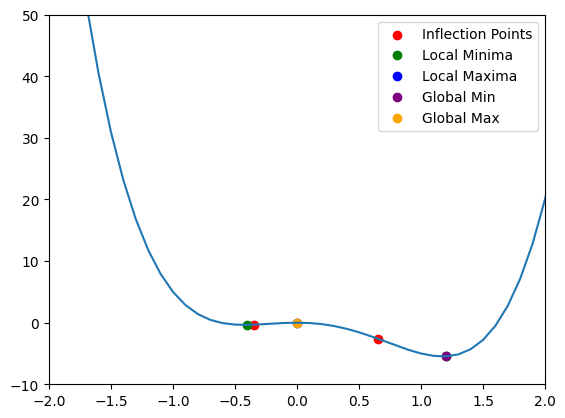

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This function finds the inflection points of a given function over a given range.
# It takes the function, start, end and step as parameters. 
# It first creates an array of x values between the start and end, using the step size. 
# Then it uses the function to calculate the corresponding y values. 
# The first and second derivatives of the function are calculated using the numpy diff method.
# The function then goes through the second derivative array and checks if two consecutive values 
# have opposite signs indicating an inflection point.
# If so, it takes the average of the x values of the two points and finds the corresponding y value
# to create the inflection point. These points are stored in an array and returned.
def find_inflection_points(func, start, end, step):
    x = np.arange(start, end, step)
    y = func(x)
    first_derivative = np.diff(y) / np.diff(x)
    second_derivative = np.diff(first_derivative) / np.diff(x[:-1])

    inflection_points = []
    for i in range(len(second_derivative) - 1):
        if second_derivative[i] * second_derivative[i + 1] < 0:
            if i + 1 < len(second_derivative):
                inflection_x = (x[i] + x[i + 1]) / 2
                inflection_y = func(inflection_x)
                inflection_points.append((inflection_x, inflection_y))
    return inflection_points


def plot_function(func):
    start = -30
    end = 30
    step = 0.1
    x = np.arange(start, end, step)
    y = func(x)

    inflection_points = find_inflection_points(func, start, end, step)
    inflection_x, inflection_y = zip(*inflection_points)

    local_minima = []
    local_maxima = []
    for i in range(1, len(y) - 1):
        if y[i] < y[i - 1] and y[i] < y[i + 1]:
            local_minima.append((x[i], y[i]))
        elif y[i] > y[i - 1] and y[i] > y[i + 1]:
            local_maxima.append((x[i], y[i]))

   
    if local_minima:
        global_min = min(local_minima, key=lambda x: x[1])
    if local_maxima:
        global_max = max(local_maxima, key=lambda x: x[1])
    else:
        global_min = None
        global_max = None

    plt.xlim(-2, 2)
    plt.ylim(-10, 50)
    plt.plot(x, y)
    plt.scatter(inflection_x, inflection_y,
                color="red", label="Inflection Points")
    plt.scatter(*zip(*local_minima), color="green", label="Local Minima")
    plt.scatter(*zip(*local_maxima), color="blue", label="Local Maxima")
    if global_min:
        plt.scatter(*global_min, color="purple", label="Global Min")
    if global_max:
        plt.scatter(*global_max, color="orange", label="Global Max")
    plt.legend()
    plt.show()


def h(x):
    return (x**4 - x**3 - x**2)*5


plot_function(h)


On this plot local minima is at [-0.4, 0], global minima is at [1.25, 0] and inflection points are x=-0.3 and x=0.6

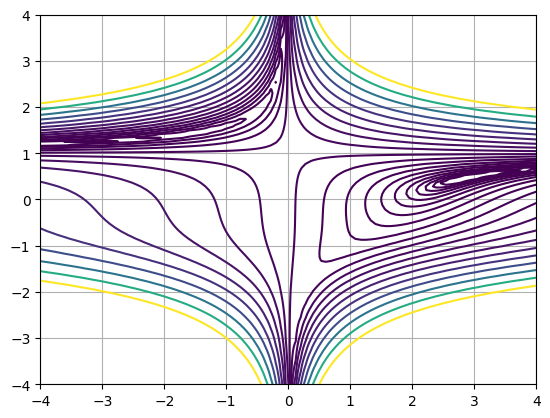

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = (1.5 - X1 + X1 * X2) ** 2 + (2.25 - X1 + X1 * X2 ** 2) ** 2 + (2.625 - X1 + X1 * X2 ** 3) ** 2

plt.contour(X1, X2, Y, levels=np.logspace(-1, 3, 20))
plt.grid()
plt.show()


The gradient's direction is shown by the contour lines' direction, and its magnitude is indicated by the contour lines' spacing. The second derivative is indicated by the curvature of the contour lines, which are concave up for positive second derivative and concave down for negative second derivative (inflection point) (minimum or maximum).

The following code block will determine the FONC and SONC of first function.

In [3]:
import numpy as np

def h(x):
    return (x**4 - x**3 - x**2)

def h_prime(x):
    return (4*x**3 - 3*x**2 - 2*x)

def h_double_prime(x):
    return (12*x**2 - 6*x - 2)

def getFonc(x):
    return h_prime(x_global_min) == 0

def getSonc(x): 
    return h_double_prime(x_global_min) > 0

x_global_min = 1.25
x_local_min = -0.4
x_infl_point_1 = -0.3
x_infl_point_2 = 0.6

print("Global Min: ", x_global_min)
print("Local Min: ", x_local_min)
print("Inflection Point 1: ", x_infl_point_1)
print("Inflection Point 2: ", x_infl_point_2)
print("============================================")
print("(FONC) for global min:", getFonc(x_global_min))
print("(FONC) for local min:", getFonc(x_local_min))
print("(FONC) for inflection point 1:", getFonc(x_infl_point_1))
print("(FONC) for inflection point 2:", getFonc(x_infl_point_2))
print("============================================")
print("(SONC) for global min:", getSonc(x_global_min))
print("(SONC) for local min:", getSonc(x_local_min))
print("(SONC) for inflection point 1:", getSonc(x_infl_point_1))
print("(SONC) for inflection point 2:", getSonc(x_infl_point_2))


Global Min:  1.25
Local Min:  -0.4
Inflection Point 1:  -0.3
Inflection Point 2:  0.6
(FONC) for global min: False
(FONC) for local min: False
(FONC) for inflection point 1: False
(FONC) for inflection point 2: False
(SONC) for global min: True
(SONC) for local min: True
(SONC) for inflection point 1: True
(SONC) for inflection point 2: True


**Question 2.**<br></br> 

Consider Example 2.1 in [Kochenderfer and Wheeler (2019)](#Kochenderfer-and-Wheeler-2019) and perform the following steps.

1.  
    Use the [```SymPy```](https://www.sympy.org/en/index.html) package already considered in the in-class Python template to derive the derivative of the function $f(x) = -(16x^2-24x+5)e^{-x}$. Then, compute the derivative of $f$ at $\hat{x} = 2.8$ and report it.<br></br>

2.
    Read the Autograd tutorial [```here```](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md). Then use it in Python to compute the derivative of function $f$ at $\hat{x} = 2.8$. ```Sympy``` was used in the class lectures. See associated Python templates. We will use ```AutoGrad``` later within ```PyTorch```, so it is useful to get familiar with it now.<br></br>

In [4]:
import sympy
from sympy import Symbol
from autograd import grad
import autograd.numpy as np

# Using SymPy
# Declare symbol X
x = Symbol('x')
# Our Function definition
my_f1 = -(16 * x**2 - 24 * x + 5) * sympy.exp(-x)
# Get prime func from X
f_prime = my_f1.diff(x)
# Set val for X hat
x_hat = 2.8
# Get derivative at value=2.8 from func
f_prime_eval = float(f_prime.evalf(subs={x: x_hat}))
print("The derivative using SymPy:", f_prime_eval)

# Using Autograd
# First, we make a function representation
def my_f2(x):
    return -(16 * x**2 - 24 * x + 5) * np.exp(-x)

# Then, we shoud get prime calculating function for our function
my_f_prime_func = grad(my_f2)
derivative_autograd_val = my_f_prime_func(2.8)
print("The derivative using autograd:", derivative_autograd_val)

The derivative using SymPy: -0.1435117477955148
The derivative using autograd: -0.14351174779551457


**Question 3**.<br></br>

In this problem, we will build regression models for home price prediction. Let's begin by loading the data that includes a training set and a test set stored in the files named ```home_price_clean_train.csv```  and ```home_price_clean_test.csv```, respectively. Please see the file ```home_price_data_description.txt``` for the description of each column in the data set.<br></br>

Denote by $\mathcal{T}:= \{(y_i,x_i):i=1,2,\dots,1022\}$ the training set that contains 1022 data points where $y_i$ is the ```SalePrice``` and $x_i$ is the feature vector for the $i$-th observation. Define the following loss functions as Python functions:
$$\mathrm{OLS}(\beta, \mathcal{T}) :=  \frac{1}{1022}\sum_{i=1}^{1022} (y_i - \beta^\top x_i)^2 $$

1. 
    Use the python code below and write a function that computes $\mathrm{OLS}(\beta, \mathcal{T})$ at every input $\beta$.

2. 
    Use the python code below and write a function that uses ```autograd``` library to compute the gradient of $\mathrm{OLS}(\beta, \mathcal{T})$ at every input $\beta$. Then evaluate the gradient of $\mathrm{OLS}(\beta, \mathcal{T})$ at the point $\hat \beta = (1,1,\dots,1)$. <br></br>

3. 
    Use ordinary least squares linear regression module implemented in [```sklearn.linear_model.LinearRegression```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression) to regress ```SalePrice``` against all other columns in the data set. Report the $R^2$ of your model on both training set $\mathcal{T}$. Please see below for the definition of $R^2$.  


**What is $R^2$?** It is a statistical measure of fit that can be associated with your regression. It is defined as 
    
$$R^2 := 1 - \frac{\text{Unexplained variance}}{\text{Total variance}}$$

**How to compute $R^2$?** Assume you have minimized a loss function (e.g., OLS in above) and obtained optimal coefficients $\beta^*$. The $R^2$ of your model on an arbitrary dataset $\mathcal{D}:=\{(y^d_i,x^d_i):i=1,2,\dots,N)\}$ (e.g., training set, test set, etc) is defined as follows. The unexplained variance is the sum of the differences between the value of the dependent variable and the prediction, that is, $\sum_{i=1}^{N} \big(y^d_i  \ -\  (\beta^*)^\top x^d_i\big)^2$. The total variance is the sum of the deviations of the dependent variable values from the mean $\bar{y} = \frac{1}{N}\sum_{i=1}^{N} y_i^d$, that is, $\sum_{i=1}^{N} \big(y^d_i \ -\  \bar{y}\big)^2$. Therefore, $R^2$ is defined as follows:
    
$$ R^2:=1-\frac{\sum_{i=1}^{N} \big(y^d_i  \ -\  (\beta^*)^\top x^d_i\big)^2}{\sum_{i=1}^{N} \big(y^d_i \ -\  \bar{y}\big)^2}.$$


In [5]:
import numpy as np
import pandas as pd
from autograd import grad

def OLS(beta,train_X,train_y):
    N = len(train_y)
    return (1/N) * np.sum((train_y - np.dot(train_X, beta))**2)

def OLS_gradient(beta,train_X,train_y):
    gradient_OLS = grad(OLS)
    return gradient_OLS(beta, train_X, train_y)

train_set = pd.read_csv("../IDS435-Assignment-1/home_price_data/home_price_clean_train.csv")
test_set = pd.read_csv("../IDS435-Assignment-1/home_price_data/home_price_clean_test.csv")

train_y = train_set["SalePrice"]
train_X = train_set.drop("SalePrice", axis=1)

beta = np.ones(train_X.shape[1])

print("Gradient of OLS at beta = (1, 1, ..., 1):", OLS_gradient(beta, train_X.values, train_y.values))


Gradient of OLS at beta = (1, 1, ..., 1): [-1.72650087e+07 -3.42456844e+09 -2.07225626e+06 -1.72903106e+06
 -6.16147193e+08 -6.19799722e+08 -4.50955035e+07 -1.65315716e+08
 -1.43035935e+07 -1.90219905e+08 -3.69839214e+08 -3.99071303e+08
 -1.27996224e+08 -1.58716395e+06 -5.28654690e+08 -1.48308307e+05
 -1.70071331e+04 -5.34424914e+05 -1.38477051e+05 -9.14986836e+05
 -3.22615900e+05 -2.16107094e+06 -2.32295826e+05 -6.17390093e+08
 -6.17451618e+05 -1.64870040e+08 -3.59629135e+07 -1.70099286e+07
 -5.70051609e+06 -1.25514994e+06 -5.61605914e+06 -1.57772302e+06
 -1.00651207e+07 -2.00632242e+06 -6.25324306e+08]
